## Observations and Insights 

#Observation 1

        Regarding the last plot, there is a strong positive relationship between the weight of Capomulin test mice 
    and average tumor volume. This strongly suggests that there's a link between tumor weight/size and mouse weight, suggesting
    that Capomulin does not work as well on heavier test subjects.

#Observation 2
   
       The box and whisker plot with all four SEM charts on it shows that Capomulin and Ramicane both have much lower ranges of 
    tumor volume across their entire ranges. Given that the other two of the four major options are much higher on tumor
    volume, it would suggest that the lower two are in general far more effective.

#Observation 3

        Observation of the line chart of Test Mouse S185's chart shows incredibly promising trends. S185 is responding
    positively to a Capomulin regimen and the chart shows extreme reduction in tumor volume as the timepoint advances. This
    is promising for Capomulin and suggests that perhaps there are bodily factors in S185 that make it more receptive to the 
    treatment.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharma_data = mouse_metadata.merge(study_results)
pharma_data = pharma_data.dropna()
## Merges "study_results" into "mouse_metadata" along the common column of Mouse ID, pairing data that shares the common column
## while dropping the data for other mice that aren't shared between the two dataframes.

# Display the data table for preview
pharma_data

#pharma_data.head(915) was where the duplicate was

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
#for viewing the whole unique list
#pharma_data['Mouse ID'].unique()

# Checking the number of mice.
mice_amt = len(pharma_data['Mouse ID'].unique())
mice_amt



#This is the amount of unique mice compared together in the dataframe.

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#tot_purch_perBin = PA_age_df.groupby("Age Bins").Price.sum()
mice_group = pharma_data.groupby("Mouse ID").count()
mice_group = mice_group.sort_values(by="Timepoint",ascending=False)
mice_group

## The value with duplicates has been detected using count and a sort for highest value - the one with more timepoint
## entries turned out to be the one with duplicate values. 



,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,13,13,13,13,13,13,13
a203,10,10,10,10,10,10,10
n364,10,10,10,10,10,10,10
m546,10,10,10,10,10,10,10
m550,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...
x226,1,1,1,1,1,1,1
b447,1,1,1,1,1,1,1
f932,1,1,1,1,1,1,1


In [22]:
bad_mouse = mice_group.index.values[0]
bad_mouse

#detects and returns the Mouse ID of the duplicate mouse for future use

'g989'

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mouse_df = pharma_data.loc[pharma_data["Mouse ID"] == bad_mouse]
bad_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#df = df[~df['your column'].isin(['list of strings'])]

pharma_data = pharma_data[~pharma_data["Mouse ID"].isin([bad_mouse])]
pharma_data

## dropped any rows containing the Mouse ID of the duplicate mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice in the clean DataFrame.

mice_amt = len(pharma_data['Mouse ID'].unique())
mice_amt

#One less mouse, now that the duplicate amount has been removed.

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen


##
## Uses Pandas to quickly determine the summary stats required,
## using a copy of the main dataframe to maintain consistency.
##

pharma_copy = pharma_data.copy()
regimen_mean = pharma_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = pharma_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_variance = pharma_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std = pharma_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = pharma_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

##
## Prunes old columns and adds in new columns with the summary stats.
##

drug_regimens = pharma_copy.groupby("Drug Regimen")
pharma_summarystats_df = drug_regimens.count()
del pharma_summarystats_df['Mouse ID']
del pharma_summarystats_df['Sex']
del pharma_summarystats_df['Age_months']
del pharma_summarystats_df['Weight (g)']
del pharma_summarystats_df['Timepoint']
del pharma_summarystats_df['Tumor Volume (mm3)']
del pharma_summarystats_df['Metastatic Sites']

pharma_summarystats_df['Mean'] = regimen_mean
pharma_summarystats_df['Median'] = regimen_median
pharma_summarystats_df['Variance'] = regimen_variance
pharma_summarystats_df['Standard Dev'] = regimen_std
pharma_summarystats_df['SEM'] = regimen_sem

##
## Display new dataframe.
##

pharma_summarystats_df



,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Mice Over Time')

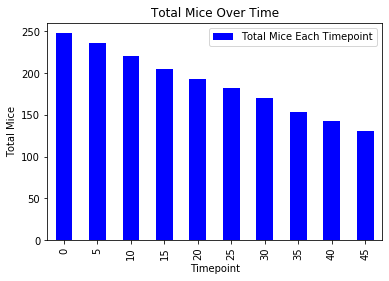

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



##
## Copying and setting up the dataframe.
##

pharma_bar_copy = pharma_data.copy()

micetotal_each_treatment = pharma_bar_copy.groupby("Timepoint")

totalmice_df = micetotal_each_treatment.count()
del totalmice_df['Sex']
del totalmice_df['Age_months']
del totalmice_df['Weight (g)']
del totalmice_df['Drug Regimen']
del totalmice_df['Tumor Volume (mm3)']
del totalmice_df['Metastatic Sites']

totalmice_df = totalmice_df.rename(columns={"Mouse ID":"Total Mice Each Timepoint"})


##
## Plotting the bar chart with Pandas plot.
##




plot = totalmice_df.plot.bar(y='Total Mice Each Timepoint', color = 'blue')
plot.set_ylabel("Total Mice")
plot.set_title("Total Mice Over Time")





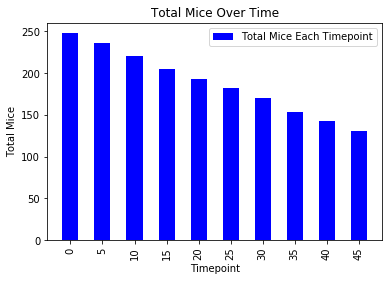

In [28]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


##
## Copying and setting up the dataframe.
##


pharma_bar2_copy = pharma_data.copy()

micetotal_each_treatment2 = pharma_bar2_copy.groupby("Timepoint")


totalmice_df2 = micetotal_each_treatment2.count()
del totalmice_df2['Sex']
del totalmice_df2['Age_months']
del totalmice_df2['Weight (g)']
del totalmice_df2['Drug Regimen']
del totalmice_df2['Tumor Volume (mm3)']
del totalmice_df2['Metastatic Sites']

totalmice_df2 = totalmice_df2.rename(columns={"Mouse ID":"Total Mice Each Timepoint"})


##
## Plotting the bar chart with PyPlot.
##





x_axis = totalmice_df2.index
y_axis = totalmice_df2["Total Mice Each Timepoint"]

plt.bar(x_axis,y_axis,color='blue',width=2.5, label='Total Mice Each Timepoint')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,[value for value in x_axis])
plt.xlabel('Timepoint')
plt.ylabel('Total Mice')
plt.title('Total Mice Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Gender Distribution in Test Mice')

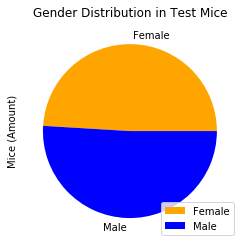

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


##
## Copying and setting up the dataframe.
##


pharma_pie_copy = pharma_data.copy()

mice_each_gender = pharma_pie_copy.groupby("Sex")

gender_df = mice_each_gender.count()


del gender_df['Age_months']
del gender_df['Weight (g)']
del gender_df['Drug Regimen']
del gender_df['Tumor Volume (mm3)']
del gender_df['Metastatic Sites']
del gender_df['Timepoint']

gender_df = gender_df.rename(columns={"Mouse ID":"Mice (Amount)"})
gender_df



##
## Plotting the bar chart with Pandas plot.
##



plot = gender_df.plot.pie(y='Mice (Amount)', colors = ["orange","blue"])
plot.legend(loc='lower right')

plot.set_title("Gender Distribution in Test Mice")




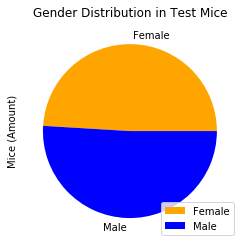

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


##
## Copying and setting up the dataframe.
##


pharma_pie2_copy = pharma_data.copy()

mice_each_gender2 = pharma_pie2_copy.groupby("Sex")

gender_df2 = mice_each_gender2.count()


del gender_df2['Age_months']
del gender_df2['Weight (g)']
del gender_df2['Drug Regimen']
del gender_df2['Tumor Volume (mm3)']
del gender_df2['Metastatic Sites']
del gender_df2['Timepoint']

gender_df2 = gender_df2.rename(columns={"Mouse ID":"Mice (Amount)"})



##
## Plotting the bar chart with PyPlot.
##


labels = gender_df2.index
sizes = gender_df2["Mice (Amount)"]
colors = ["orange","blue"]
plt.pie(sizes,labels = labels, colors = colors)


plt.ylabel('Mice (Amount)')
plt.title('Gender Distribution in Test Mice')
plt.legend(loc="lower right")

plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


BigFour_copy_df = pharma_data.copy()


# Start by getting the last (greatest) timepoint for each mouse
mouse_group = BigFour_copy_df.groupby("Mouse ID")["Timepoint"].max()
mouse_group_df = pd.DataFrame([mouse_group])

mouse_group_df = mouse_group_df.transpose()
mouse_group_df = mouse_group_df.rename(columns={"Timepoint":"Last Timepoint"})
mouse_group_df






mouse_ids = mouse_group_df.index.values
mouse_last_timepoints = list(mouse_group_df["Last Timepoint"].values)
Final_Volume_df = pd.DataFrame()
for x in range(len(mouse_ids)):
    Final_Volume_df = Final_Volume_df.append(BigFour_copy_df.loc[((BigFour_copy_df["Mouse ID"] ==  mouse_ids[x]) & 
                                                                (BigFour_copy_df["Timepoint"] == mouse_last_timepoints[x]))])


Cap_df = Final_Volume_df.loc[BigFour_copy_df["Drug Regimen"] == "Capomulin"]
Ram_df = Final_Volume_df.loc[BigFour_copy_df["Drug Regimen"] == "Ramicane"]
Inf_df = Final_Volume_df.loc[BigFour_copy_df["Drug Regimen"] == "Infubinol"]
Cef_df = Final_Volume_df.loc[BigFour_copy_df["Drug Regimen"] == "Ceftamin"]

FinalTumorVolume_df = Cap_df.append(Ram_df)
FinalTumorVolume_df = FinalTumorVolume_df.append(Inf_df)
FinalTumorVolume_df = FinalTumorVolume_df.append(Cef_df)

FinalTumorVolume_df



#for x in range(len(mouse_ids)):
#       print(mouse_ids[x])

#for x in range(len(mouse_last_timepoints)):
#    print(mouse_last_timepoints[x])

#print(range(len(mouse_ids)))
#print(range(len(mouse_last_timepoints)))




#for x in range(len(mouse_last_timepoints)):
#    print(mouse_last_timepoints[x])


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [32]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_finalvolume = FinalTumorVolume_df["Tumor Volume (mm3)"]









# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = tumor_finalvolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
IQR = upperq-lowerq

print(lowerq)
print(upperq)
print(IQR)
print(f"Median is {quartiles[0.5]}")
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    
## This was accomplished earlier with loc statements to discern the mice on the proper regimens
## and then append statements to combine them into FinalTumorVolume_df.
    
    
# add subset 
    
    
 # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"Anything below {lower_bound} is likely an outlier.")
print(f"Anything above {upper_bound} is likely an outlier.")

37.187743802499995
59.930261755000004
22.74251795250001
Median is 45.0
Anything below 3.0739668737499812 is likely an outlier.
Anything above 94.04403868375002 is likely an outlier.


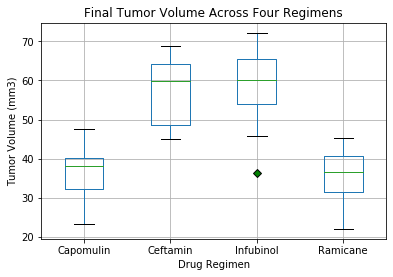

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

##
##This line sets outliers to be changed to green diamonds 
##
green_diamond = dict(markerfacecolor='g', marker='D')


##
## Invoke and format chart, adjusting labels and title while removing the suptitle.
##
FinalTumorVolume_df.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", flierprops=green_diamond)
plt.ylabel("Tumor Volume (mm3)")
plt.suptitle("")
plt.title("Final Tumor Volume Across Four Regimens")


plt.show()


## Line and Scatter Plots

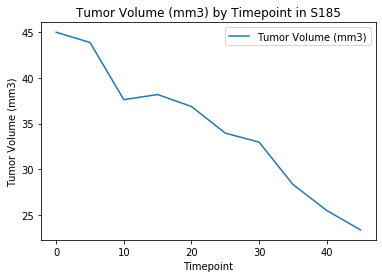

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

linecopy_df = pharma_data.copy()

##
## Builds a dataframe for a single mouse - s185, a Capomulin regimen test mouse.
##

s185_df = linecopy_df.loc[linecopy_df["Mouse ID"] == "s185"]


##
## time point x
## tumor volume y
##

x_axis = s185_df["Timepoint"]
y_axis = s185_df["Tumor Volume (mm3)"]

##
## Invoke and customize the line plot.
##
plt.plot(x_axis,y_axis,label="Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) by Timepoint in S185")
plt.legend()
plt.show()









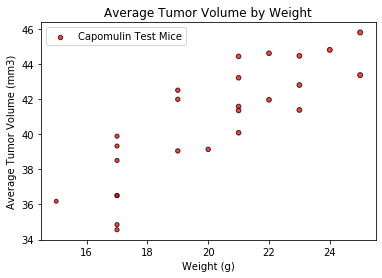

In [35]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scattercopy_df = pharma_data.copy()

scattercopy_df = scattercopy_df.loc[scattercopy_df["Drug Regimen"] == "Capomulin"]


avg_tumor_group = scattercopy_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight_group = scattercopy_df.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(mouse_weight_group, avg_tumor_group,marker="o",facecolors="red",edgecolors="black",s=mouse_weight_group, alpha=0.75, label="Capomulin Test Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")
plt.legend()
plt.show()
#scatterplot with these two variables
#tada


## Correlation and Regression

0.84
The r-squared is : 0.7088568047708715


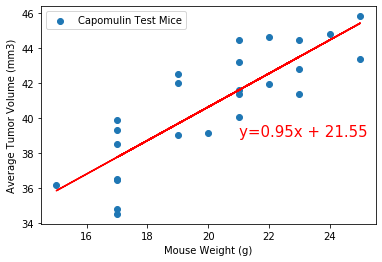

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#avg_tumor_group = scattercopy_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
#mouse_weight_group = scattercopy_df.groupby("Mouse ID")["Weight (g)"].mean()

#plt.scatter(mouse_weight_group, avg_tumor_group,marker="o",facecolors="red",edgecolors="black",s=mouse_weight_group, alpha=0.75, label="Capomulin Test Mice")


##
## Correlation coefficient using the Pearson function.
##
correlation = st.pearsonr(mouse_weight_group, avg_tumor_group)
print(round(correlation[0],2))


##
## Linear regression model
##

x_values = mouse_weight_group
y_values = avg_tumor_group
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y="+str(round(slope,2))+"x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, label="Capomulin Test Mice")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,39),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()

print(f"The r-squared is : {rvalue**2}")
plt.show()